<a href="https://www.kaggle.com/code/gaurav909/ipl-auction-analysis?scriptVersionId=159216803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **IPL Auction Analysis**
### The Indian Premier League (IPL) is a professional Twenty20 cricket league in India, attracting top cricket players from around the world. <br> The IPL auction is a crucial event where teams bid to acquire players for the upcoming season.
![IPL](https://c.ndtvimg.com/2022-02/sh2t6ncg_ipl-auction-ipl_625x300_12_February_22.jpg?im=FaceCrop,algorithm=dnn,width=806,height=605 "IPL")

#  **Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# **Data Preparation**
#### Reading CSV Files into DataFrames

In [2]:
un_df = pd.read_csv("/kaggle/input/ipl-players-sold-2024/UNSOLD_PLAYERS.csv")
tb_df = pd.read_csv("/kaggle/input/ipl-players-sold-2024/TOP_BUYS.csv")
ip_df = pd.read_csv("/kaggle/input/ipl-players-sold-2024/IPL_PLAYERS.csv")

# **Data Exploration**

In [3]:
un_df.head()

,PLAYER,NATIONALITY,TYPE,BASE PRICE
0,Priyansh Arya,Indian,Batter,2000000
1,Rohan Kunnummal,Indian,Batter,2000000
2,Manan Vohra,Indian,Batter,2000000
3,Raj Angad Bawa,Indian,All-Rounder,2000000
4,Sarfaraz Khan,Indian,All-Rounder,2000000


In [4]:
tb_df.head()

,TEAM,NATIONALITY,TYPE,PRICE PAID
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"24,75,00,000"
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"20,50,00,000"
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"14,00,00,000"
3,Punjab Kings,Harshal Patel,All-Rounder,"11,75,00,000"
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,"11,50,00,000"


In [5]:
#Columns Nationality is not correct for tb_df dataframe
#rename column name
new_column = {"NATIONALITY":"PLAYER"}
top_buyers = tb_df.rename(columns=new_column)
top_buyers.head()

,TEAM,PLAYER,TYPE,PRICE PAID
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"24,75,00,000"
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"20,50,00,000"
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"14,00,00,000"
3,Punjab Kings,Harshal Patel,All-Rounder,"11,75,00,000"
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,"11,50,00,000"


In [6]:
ip_df.head()

,PLAYERS,NATIONALITY,TYPE,PRICE PAID,TEAM
0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,Sameer Rizvi,Indian,Batter,84000000,CSK
4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK


# **Data Cleaning**

In [7]:
# Checking for null_values
total_null = ip_df.isna().sum()
total_null

PLAYERS        0
NATIONALITY    0
TYPE           0
PRICE PAID     0
TEAM           0
dtype: int64

In [8]:
top_buyers.isna().sum()

TEAM          0
PLAYER        0
TYPE          0
PRICE PAID    0
dtype: int64

In [9]:
un_df.isna().sum()

PLAYER         0
NATIONALITY    0
TYPE           0
BASE PRICE     0
dtype: int64

#### **Checking for Duplicates**

In [10]:
ip_df.duplicated().sum()

0

In [11]:
top_buyers.duplicated().sum()

0

In [12]:
un_df.duplicated().sum()

0

### **Check for datatypes**

In [13]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYERS      72 non-null     object
 1   NATIONALITY  72 non-null     object
 2   TYPE         72 non-null     object
 3   PRICE PAID   72 non-null     int64 
 4   TEAM         72 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


In [14]:
top_buyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TEAM        10 non-null     object
 1   PLAYER      10 non-null     object
 2   TYPE        10 non-null     object
 3   PRICE PAID  10 non-null     object
dtypes: object(4)
memory usage: 448.0+ bytes


### **In top_buyers data frame PRICE PAID is of object type and not of numeric, So we have to change the dataype**

#### PRICE PAID column are strings that contain commas, such as 24,75,00,000. These commas prevent pandas from converting the strings to integers, as they are not valid characters for integer literals.

In [15]:
top_buyers['PRICE PAID'] = top_buyers['PRICE PAID'].str.replace(',', '').astype('int64')

In [16]:
top_buyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TEAM        10 non-null     object
 1   PLAYER      10 non-null     object
 2   TYPE        10 non-null     object
 3   PRICE PAID  10 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [17]:
un_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER       260 non-null    object
 1   NATIONALITY  260 non-null    object
 2   TYPE         260 non-null    object
 3   BASE PRICE   260 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.2+ KB


### **Which team spent highest number of money?**

In [18]:
Value_spent = ip_df.groupby("TEAM")["PRICE PAID"].sum()
Value_Spended=Value_spent.sort_values(ascending = False)

In [19]:
Value_Spended

TEAM
KKR    313500000
SH     308000000
CSK    304000000
GT     303000000
PK     249500000
RCB    204000000
DC     190500000
MI     167000000
RR     143000000
LSG    122000000
Name: PRICE PAID, dtype: int64

<Figure size 800x600 with 0 Axes>

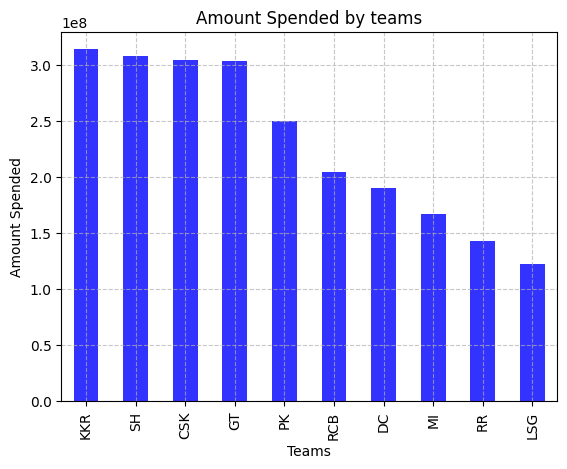

<Figure size 800x600 with 0 Axes>

In [20]:
Value_Spended.plot(kind="bar",color='blue', alpha=0.8)
plt.xlabel('Teams')
plt.ylabel('Amount Spended')
plt.title('Amount Spended by teams')
plt.grid(True, linestyle='--', alpha=0.7)
plt.figure(figsize=(8, 6))



### **How many Overseas players each team bought?**

In [21]:
overseas_players = ip_df[ip_df["NATIONALITY"]=="Overseas"].groupby("TEAM").size()
ov_play=overseas_players.sort_values()

In [22]:
#Total Players
ov_play.sum()

30

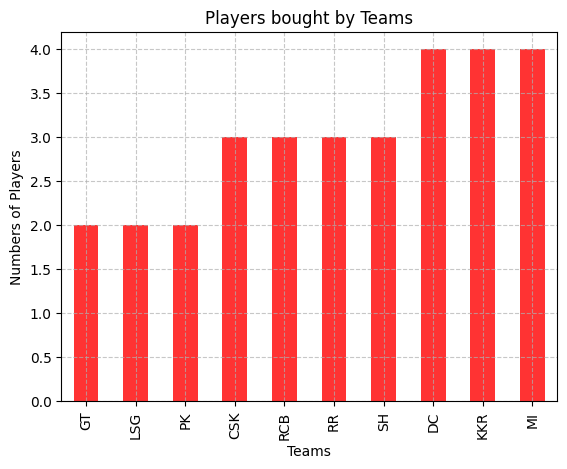

<Figure size 800x600 with 0 Axes>

In [23]:
#Teamwise Players
ov_play.plot(kind="bar",color='red', alpha=0.8)
plt.xlabel('Teams')
plt.ylabel('Numbers of Players')
plt.title('Players bought by Teams')
plt.grid(True, linestyle='--', alpha=0.7)
plt.figure(figsize=(8, 6))
plt.show()

### **How many Indian Players each team bought?**

In [24]:
Indian_players = ip_df[ip_df["NATIONALITY"]=="Indian"].groupby("TEAM").size()
Indian_players

TEAM
CSK    3
DC     5
GT     6
KKR    6
LSG    4
MI     4
PK     6
RCB    3
RR     2
SH     3
dtype: int64

In [25]:
#total players
ind_players=Indian_players.sort_values()
ind_players.sum()

42

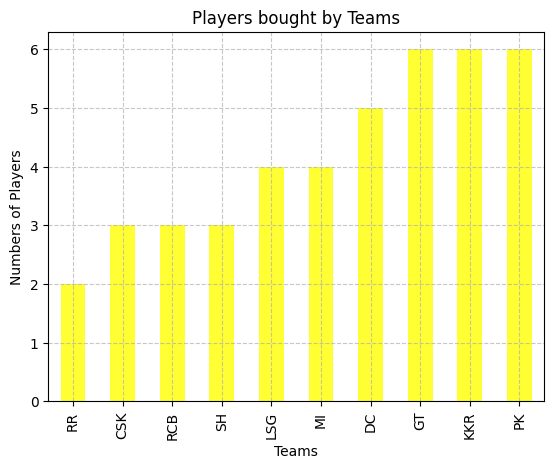

<Figure size 800x600 with 0 Axes>

In [26]:
ind_players.plot(kind="bar",color='yellow', alpha=0.8)
plt.xlabel('Teams')
plt.ylabel('Numbers of Players')
plt.title('Players bought by Teams')
plt.grid(True, linestyle='--', alpha=0.7)
plt.figure(figsize=(8, 6))
plt.show()

### **What type of players were bought mostly?**

In [27]:
players_type = ip_df.groupby("TYPE")["PLAYERS"].count()
players_type

TYPE
All-Rounder      25
Batter           13
Bowler           26
Wicket-Keeper     8
Name: PLAYERS, dtype: int64

In [28]:
play_type = players_type.sort_values()

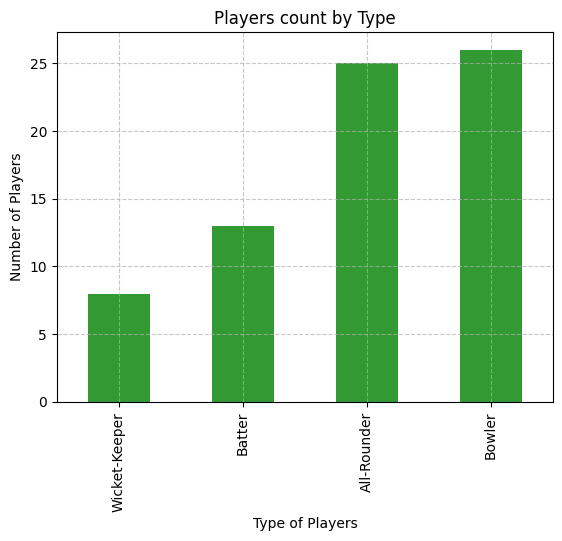

<Figure size 800x600 with 0 Axes>

In [29]:
play_type.plot(kind="bar",color='green', alpha=0.8)
plt.xlabel('Type of Players')
plt.ylabel('Number of Players')
plt.title('Players count by Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.figure(figsize=(8, 6))
plt.show()
plt.show()

### **How many players remain unsold?**

In [30]:
un_df["PLAYER"].count()

260

In [31]:
un_df.groupby("NATIONALITY")["PLAYER"].count()

NATIONALITY
Indian      174
Overseas     86
Name: PLAYER, dtype: int64

### **How many of each type player remain usold?**

In [32]:
unsold_type = un_df.groupby("TYPE")["PLAYER"].count()

In [33]:
unsold_type

TYPE
All-Rounder       89
Batter            40
Bowler           102
Wicket-Keeper     29
Name: PLAYER, dtype: int64

### **Who got the highest amount?**

In [34]:
top_buyers

,TEAM,PLAYER,TYPE,PRICE PAID
0,Kolkata Knight Riders,Mitchell Starc,Bowler,247500000
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,205000000
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,140000000
3,Punjab Kings,Harshal Patel,All-Rounder,117500000
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,115000000
5,Gujarat Titans,Spencer Johnson,Bowler,100000000
6,Chennai Super Kings,Sameer Rizvi,Batter,84000000
7,Punjab Kings,Rilee Rossouw,Batter,80000000
8,Gujarat Titans,Shahrukh Khan,All-Rounder,74000000
9,Rajasthan Royals,Rovman Powell,Batter,74000000


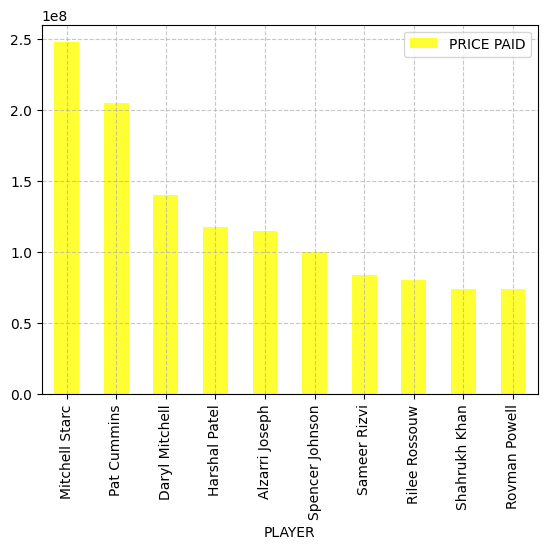

<Figure size 800x600 with 0 Axes>

In [35]:
top_buyers.plot(x="PLAYER",y="PRICE PAID",kind="bar",color='yellow', alpha=0.8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.figure(figsize=(8, 6))
plt.show()
plt.show()

# **Summary**

The IPL Auction 2024 was held on January 15, 2024, in Mumbai. A total of 332 players participated in the auction, out of which 72 players have been bought by franchises, and 260 players remain unsold.

## Players Bought by Franchises

The franchises bought a total of 30 overseas and 42 Indian players. Among the 72 bought players, 26 are bowlers, 25 are all-rounders, 13 are batters, and 8 are wicket-keepers.

The franchise that spent the highest amount was **Kolkata Knight Riders (KKR)**, with a total of ₹31.35 crore. The franchise that spent the lowest amount was **Lucknow Super Giants (LSG)**, with a total of ₹12.2 crore.

## Top 3 Buyers

The top 3 buyers in the IPL Auction 2024 were:

| Rank | Franchise               | Player             | Role          | Price (in ₹)   |
|------|-------------------------|--------------------|---------------|----------------|
| 1    | Kolkata Knight Riders   | Mitchell Starc     | Bowler        | 24.75 crore    |
| 2    | Sunrisers Hyderabad     | Pat Cummins        | All-Rounder   | 20.5 crore     |
| 3    | Chennai Super Kings     | Daryl Mitchell     | All-Rounder   | 14 crore       |
